In [113]:
library(devtools)
load_all()

ℹ Loading ghostbasil


In [7]:
generate.data <- function(n, p)
{
    X <- matrix(rnorm(n * p), n, p)
    X <- scale(X) / sqrt(n-1)
    C <- t(X) %*% X
    beta <- rnorm(p)
    y <- X %*% beta + rnorm(n)
    y <- t(X) %*% y
    list(C=C, y=y)
}

In [55]:
data <- generate.data(900, 1000)
C <- data$C
y <- data$y
lmda = 0.1
step_size = 1 / max(eigen(C, T, T)$values)
print(step_size)
x = beta

[1] 0.2388021


In [56]:
out <- solve_sub_coeffs__(C, y, lmda, step_size, x, max_iters=10000, 1e-12)

In [51]:
print(out$beta[is.nan(out$beta)])
print(out$iters)
beta <- out$beta
nrm <- sqrt(sum(beta**2))
expected <- solve(C + lmda / nrm * diag(1, p, p), y)
print(sqrt(mean((expected-beta)**2)))

numeric(0)
[1] 1825
[1] 0.00202118


In [52]:
lmda2 <- lmda * 0.99
out2 <- solve_sub_coeffs__(C, y, lmda2, step_size, out$beta, max_iters=10000, 1e-12)

In [53]:
print(out2$beta[is.nan(out2$beta)])
print(out2$iters)
beta2 <- out2$beta
nrm2 <- sqrt(sum(beta2**2))
expected <- solve(C + lmda2 / nrm2 * diag(1, p, p), y)
print(sqrt(mean((expected-beta2)**2)))

numeric(0)
[1] 98
[1] 0.001364732


## How does PCD behave with warm-start?

In [8]:
data <- generate.data(900, 1000)
C <- data$C
y <- data$y
lmda.max <- max(y)
lmdas <- lmda.max * 1.5 ** (-(1:20))
step_size <- 1 / max(eigen(C, T, T)$values)

In [9]:
x <- rep(0, length(y))
for (lmda in lmdas[1:5]) {
    start <- Sys.time()
    out.tmp <- solve_sub_coeffs__(C, y, lmda, step_size, x, max_iters=10000, 1e-12)
    end <- Sys.time()
    print(end-start)
    x <- out.tmp$beta
}

Time difference of 3.135775 secs
Time difference of 3.330276 secs
Time difference of 4.683545 secs
Time difference of 5.953867 secs
Time difference of 8.680441 secs


In [114]:
a = 3
b = 2
c = -1
d = 0.31
e = -1
x_root <- solve_quartic__(a, b, c, d, e)

[1] 168
[1]  2.220446e-16 -1.110223e-16           NaN           NaN


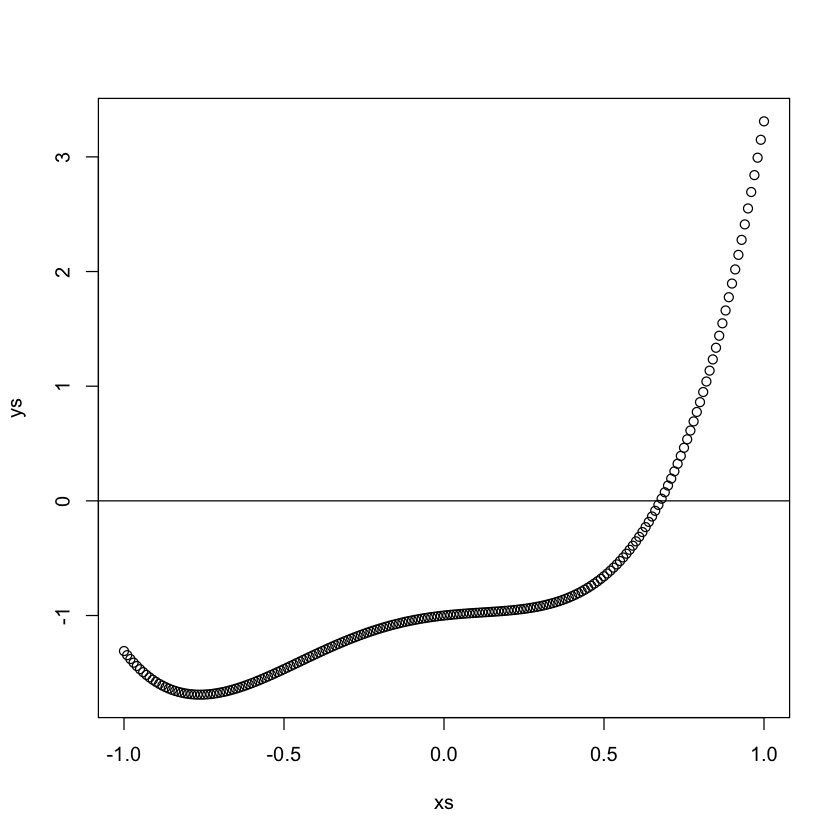

In [115]:
xs <- seq(-1, 1, 0.01)
quartic <- function(a,b,c,d,e,xs) {a * xs^4 + b * xs^3 + c * xs^2 + d * xs + e}
ys <- quartic(a,b,c,d,e,xs)
print(sum(ys < 0))
print(quartic(a,b,c,d,e,x_root))
plot(xs, ys)
abline(h=0)

In [116]:
sub_coord_desc <- function(a, b, c, d, x)
{
    x * (a + b / sqrt(x*x + c)) - d
}

In [136]:
a1 <- 0.001
b1 <- 0.1
c1 <- 2.01
d1 <- 5
h <- solve_sub_coord_desc__(a1, b1, c1, d1)
print(h)
sub_coord_desc(a1, b1, c1, d1, h)

[1] 4900


[1] -9.769963e-15